In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.manifold import TSNE
import nltk
import re
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation

In [217]:
df = pd.read_csv(r"C:\Users\Sandi\Stats MS\430\NLP-and-Topic-Modeling-on-User-Review-Dataset-master\NLP-and-Topic-Modeling-on-User-Review-Dataset-master\Review_data.csv")

In [218]:
df.head(2)

review_body  star_rating
0  Good luck finding a reasonably priced band rep...            1
1  No i get dark on the first week with me!! I wi...            1

In [219]:
# Cheching if there is any missing value
df.isnull().sum()

review_body    0
star_rating    0
dtype: int64

In [220]:
df.star_rating.value_counts()

1    3000
2    3000
3    3000
4    3000
5    3000
Name: star_rating, dtype: int64

In [221]:
# Use nltk's English stopwords.
# nltk.download('stopwords')
stpwords = stopwords.words('english')

In [222]:
def tokenization_and_stemming(text):
    # Remove punctuation characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Create a instance of stem class
    stemmer = SnowballStemmer("english")
    
    clean_tokens = []
    for word in tokens:
        clean_tok = stemmer.stem(word).lower().strip()
        if clean_tok not in stpwords:
            clean_tokens.append(clean_tok)

    return clean_tokens

In [223]:
data = df.loc[:, 'review_body'].tolist()
tokenization_and_stemming(data[1])

['get', 'dark', 'first', 'week', 'never', 'buy', 'item', 'buy']

In [224]:
tfidf_model = TfidfVectorizer(
    max_df=0.99, # max_df : maximum document frequency for the given word
    max_features=1000, # max_features: maximum number of words
    min_df=0.01, # min_df : minimum document frequency for the given word
    use_idf=True, # use_idf: if not true, we only calculate tf
    tokenizer=tokenization_and_stemming,
    ngram_range=(1,2) # ngram_range: (min, max), eg. (1, 2) including 1-gram, 2-gram
)


# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 

print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 15000 reviews and 519 terms.


In [225]:
# Check the parameters
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.99,
 'max_features': 1000,
 'min_df': 0.01,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_and_stemming(text)>,
 'use_idf': True,
 'vocabulary': None}

In [226]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [227]:
tfidf_matrix

<15000x519 sparse matrix of type '<class 'numpy.float64'>'
	with 258600 stored elements in Compressed Sparse Row format>

In [228]:
tfidf_matrix_np=tfidf_matrix.toarray()

In [229]:
tfidf_matrix_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

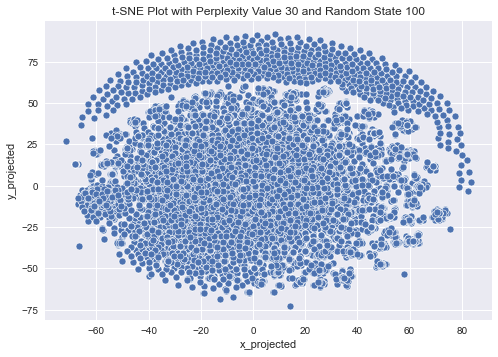

In [230]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

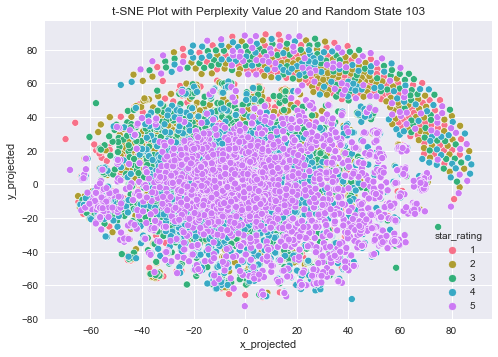

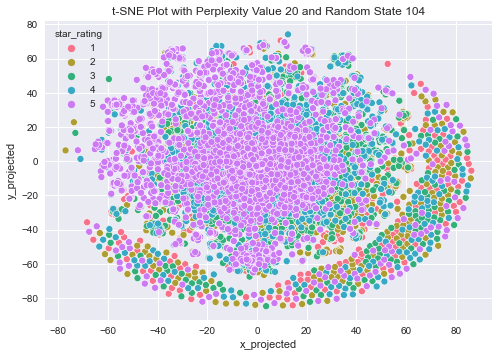

--------------------------------------------


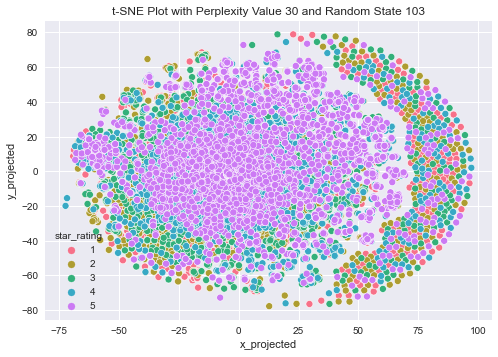

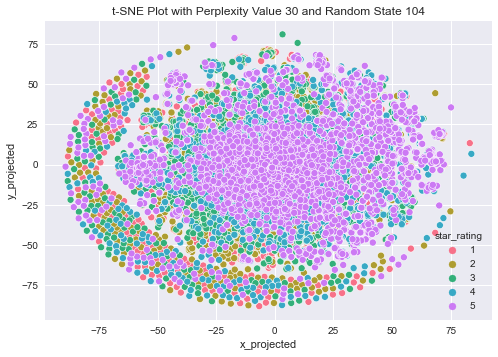

--------------------------------------------


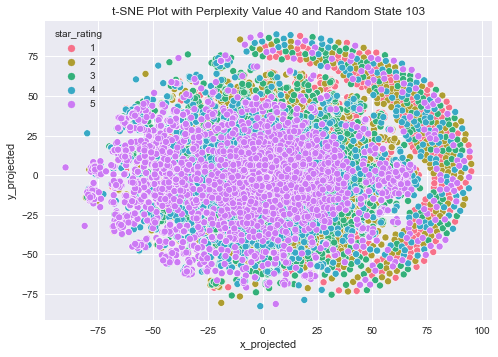

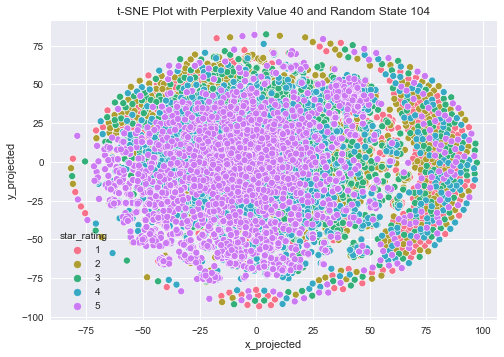

--------------------------------------------


In [53]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='star_rating', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

## Dataset 2

In [76]:
df2 = pd.read_csv(r"C:\Users\Sandi\Stats MS\430\UIUC-STAT430-Unsupervised-Learning\Final_Project\Data\Arts.txt\Arts.txt",
                 delimiter='\t')

In [79]:
df2 = df2.iloc[9:,:]

In [80]:
df2.head(15)

product/productId: B000GKXY4S
9                       product/productId: B000GKXY4S
10             product/title: Crazy Shape Scissor Set
11                             product/price: unknown
12                       review/userId: ALCX2ELNHLQA7
13                        review/profileName: Barbara
14                            review/helpfulness: 0/0
15                                  review/score: 5.0
16                            review/time: 1328659200
17                    review/summary: Making the cut!
18  review/text: Looked all over in art supply and...
19                      product/productId: B000140KIW
20  product/title: Fiskars Softouch Multi-Purpose ...
21                             product/price: unknown
22                      review/userId: A2M2M4R1KG5WOL
23                    review/profileName: L. Heminway

In [88]:
txt = 'product/productId: B000GKXY4S'
re.search('(.*:)(.*)', txt).group(2).strip()

'B000GKXY4S'

In [95]:
val = [re.search('(.*:)(.*)', x).group(2).strip() for x in df2.iloc[:, 0]]
key = [re.search('(.*:)(.*)', x).group(1).strip() for x in df2.iloc[:, 0]]

In [97]:
df2_ = pd.DataFrame.from_dict({'key':key, 'val':val})

In [138]:
df2_ = pd.DataFrame(columns=key[:10])

In [141]:
for i in range(0, int(len(val)/10)):
    item = val[10*i:10*(i+1)]
    d = {df2_.columns[0]:item[0],
     df2_.columns[1]:item[1],
     df2_.columns[2]:item[2],
     df2_.columns[3]:item[3],
     df2_.columns[4]:item[4],
     df2_.columns[5]:item[5],
     df2_.columns[6]:item[6],
     df2_.columns[7]:item[7],
     df2_.columns[8]:item[8],
     df2_.columns[9]:item[9],
}
    df2_ = df2_.append(d, ignore_index=True)
    
print(i)

27978


In [148]:
df2 = df2_.copy()

In [154]:
df2.head(2)

product/productId:                               product/title:  \
0         B000GKXY4S                      Crazy Shape Scissor Set   
1         B000140KIW  Fiskars Softouch Multi-Purpose Scissors 10"   

  product/price:  review/userId: review/profileName: review/helpfulness:  \
0        unknown   ALCX2ELNHLQA7             Barbara                 0/0   
1        unknown  A2M2M4R1KG5WOL         L. Heminway                 1/1   

  review/score: review/time:                               review/summary:  \
0           5.0   1328659200                               Making the cut!   
1           5.0   1156636800  Fiskars Softouch Multi-Purpose Scissors, 10"   

                                        review/text:  
0  Looked all over in art supply and other stores...  
1  These are the BEST scissors I have ever owned....

In [156]:
data = df2.loc[:, 'review/text:'].tolist()
tokenization_and_stemming(data[42])

['caution',
 'wast',
 'time',
 'money',
 'onli',
 'receiv',
 'one',
 'canva',
 'six',
 'like',
 'product',
 'say',
 'titl',
 'seller',
 'feedback']

In [157]:
# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 27979 reviews and 588 terms.


In [159]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [158]:
tfidf_matrix

<27979x588 sparse matrix of type '<class 'numpy.float64'>'
	with 557493 stored elements in Compressed Sparse Row format>

In [160]:
tfidf_matrix_np=tfidf_matrix.toarray()

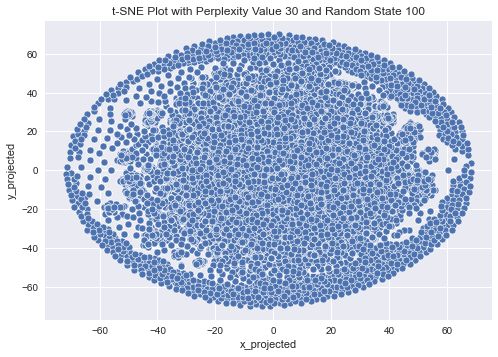

In [161]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

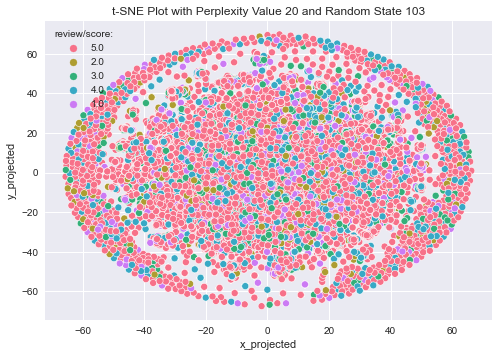

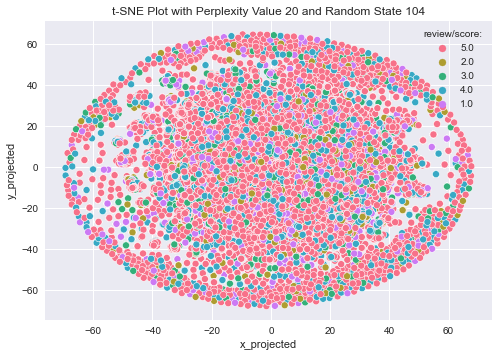

--------------------------------------------


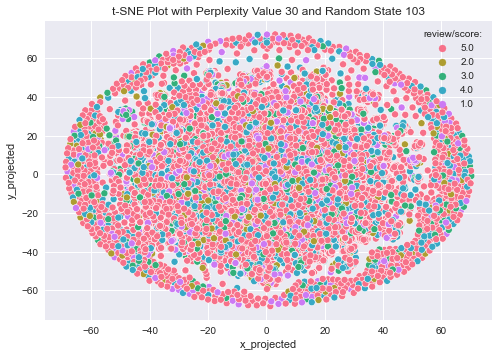

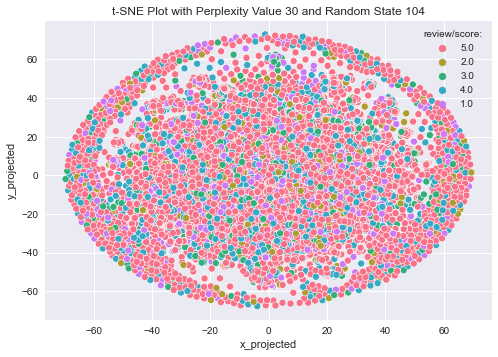

--------------------------------------------


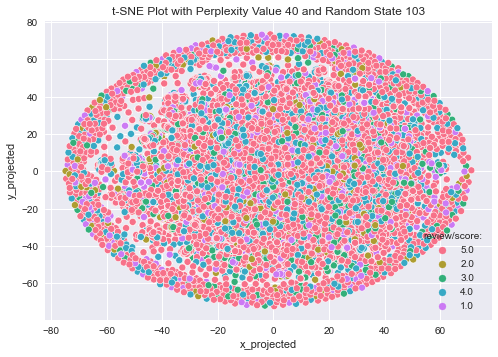

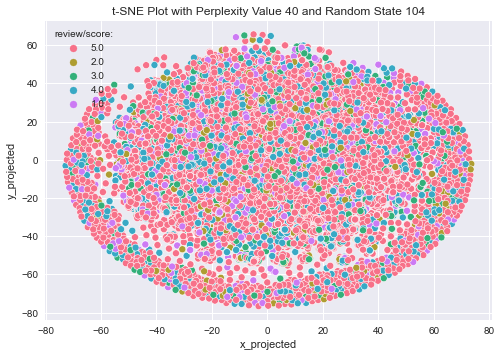

--------------------------------------------


In [163]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df2, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='review/score:', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

## Dataset 3

In [165]:
df3 = pd.read_csv(r"C:\Users\Sandi\Stats MS\430\UIUC-STAT430-Unsupervised-Learning\Final_Project\Data\Cell_Phones_&_Accessories.txt\Cell_Phones_&_Accessories.txt",
                 delimiter='\t')

In [167]:
df3 = df3.iloc[9:,:]

In [168]:
df3.head(15)

product/productId: B000JVER7W
9                       product/productId: B000JVER7W
10  product/title: Mobile Action MA730 Handset Man...
11                             product/price: unknown
12                       review/userId: A7L6E1KSJTAJ6
13                   review/profileName: Steven Martz
14                            review/helpfulness: 0/0
15                                  review/score: 5.0
16                            review/time: 1191456000
17  review/summary: Mobile Action Bluetooth Mobile...
18  review/text: Great product- tried others and t...
19                      product/productId: B000JVER7W
20  product/title: Mobile Action MA730 Handset Man...
21                             product/price: unknown
22                      review/userId: A2NOQQ7I6PU7CW
23  review/profileName: Daniel M. Johnson "rocknbl...

In [169]:
txt = 'product/productId: B000GKXY4S'
re.search('(.*:)(.*)', txt).group(2).strip()

'B000GKXY4S'

In [170]:
val = [re.search('(.*:)(.*)', x).group(2).strip() for x in df3.iloc[:, 0]]
key = [re.search('(.*:)(.*)', x).group(1).strip() for x in df3.iloc[:, 0]]

In [174]:
df3_ = pd.DataFrame.from_dict({'key':key, 'val':val})

In [175]:
df3_ = pd.DataFrame(columns=key[:10])

In [176]:
for i in range(0, int(len(val)/10)):
    item = val[10*i:10*(i+1)]
    d = {df3_.columns[0]:item[0],
     df3_.columns[1]:item[1],
     df3_.columns[2]:item[2],
     df3_.columns[3]:item[3],
     df3_.columns[4]:item[4],
     df3_.columns[5]:item[5],
     df3_.columns[6]:item[6],
     df3_.columns[7]:item[7],
     df3_.columns[8]:item[8],
     df3_.columns[9]:item[9],
}
    df3_ = df3_.append(d, ignore_index=True)
    
print(i)

78928


In [177]:
df3 = df3_.copy()

In [178]:
df3.head(2)

product/productId:                                     product/title:  \
0         B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   
1         B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   

  product/price:  review/userId:                 review/profileName:  \
0        unknown   A7L6E1KSJTAJ6                        Steven Martz   
1        unknown  A2NOQQ7I6PU7CW  Daniel M. Johnson "rocknbluesharp"   

  review/helpfulness: review/score: review/time:  \
0                 0/0           5.0   1191456000   
1                 0/0           4.0   1186704000   

                                     review/summary:  \
0  Mobile Action Bluetooth Mobile Phone Tool Soft...   
1                                               good   

                                        review/text:  
0  Great product- tried others and this is a ten ...  
1  works real good....a little hard to set up...w...

In [180]:
data = df3.loc[:, 'review/text:'].tolist()
tokenization_and_stemming(data[42])

['look',
 'someth',
 'work',
 'jawbon',
 'icon',
 'set',
 'consist',
 'pair',
 'eargel',
 'three',
 'size',
 'found',
 'size',
 'fit',
 'insert',
 'icon',
 'work',
 'ok',
 'snug',
 'would',
 'like',
 'right',
 'ear',
 'tri',
 'left',
 'ear',
 'one',
 'much',
 'better',
 'fit',
 'better',
 'sound',
 'louder',
 'tri',
 'sever',
 'type',
 'earphon',
 'adapt',
 'seem',
 'work',
 'better',
 'problem',
 'fit',
 'one',
 'ear',
 'tri',
 'one']

In [192]:
df3['review/score:'].value_counts()

5.0    30253
4.0    17717
1.0    14674
3.0     8719
2.0     7566
Name: review/score:, dtype: int64

In [193]:
df3.describe()

product/productId:                                     product/title:  \
count               78929                                              78929   
unique               7438                                               7122   
top            B0009B0IX4  Plantronics Voyager 510 Bluetooth Headset [Ret...   
freq                 3443                                               3443   

       product/price: review/userId: review/profileName: review/helpfulness:  \
count           78929          78929               78929               78929   
unique            944          68040               63338                1305   
top           unknown        unknown             unknown                 0/0   
freq            43286           2276                2276               34919   

       review/score: review/time: review/summary: review/text:  
count          78929        78929           78929        78929  
unique             5         4431           60184        76755  
top              5.0   1168300800   Great Product            )  
freq           30253          519             211          373

In [203]:
d1 = df3[df3['review/score:']=='1.0'][:7566]
d2 = df3[df3['review/score:']=='2.0'][:7566]
d3 = df3[df3['review/score:']=='3.0'][:7566]
d4 = df3[df3['review/score:']=='4.0'][:7566]
d5 = df3[df3['review/score:']=='5.0'][:7566]

In [204]:
df3_combined = pd.DataFrame(columns=key[:10])
df3_combined = df3_combined.append(d1, ignore_index=True)
df3_combined = df3_combined.append(d2, ignore_index=True)
df3_combined = df3_combined.append(d3, ignore_index=True)
df3_combined = df3_combined.append(d4, ignore_index=True)
df3_combined = df3_combined.append(d5, ignore_index=True)

In [205]:
df3_combined['review/score:'].value_counts()

1.0    7566
2.0    7566
3.0    7566
4.0    7566
5.0    7566
Name: review/score:, dtype: int64

In [207]:
data = df3_combined.loc[:, 'review/text:'].tolist()

# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 37830 reviews and 710 terms.


In [208]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [209]:
tfidf_matrix

<37830x710 sparse matrix of type '<class 'numpy.float64'>'
	with 1033704 stored elements in Compressed Sparse Row format>

In [210]:
tfidf_matrix_np=tfidf_matrix.toarray()

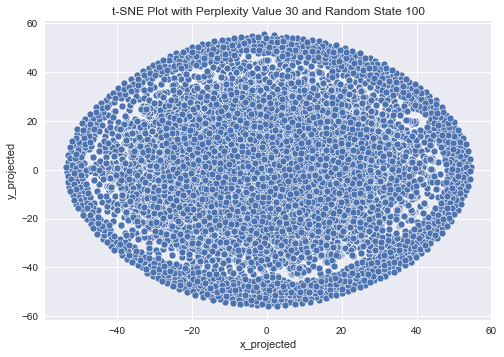

In [211]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

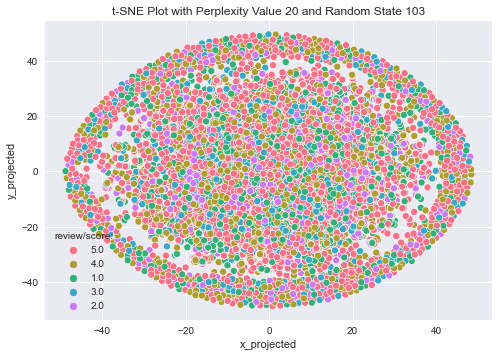

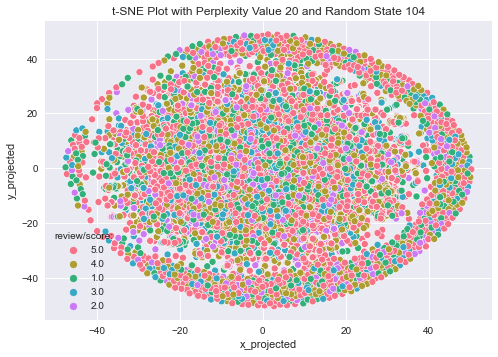

--------------------------------------------


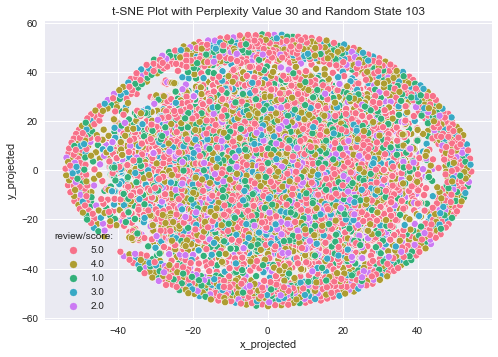

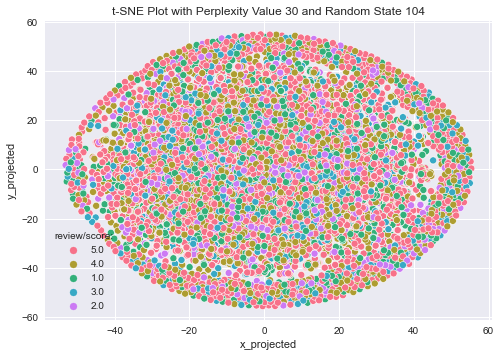

--------------------------------------------


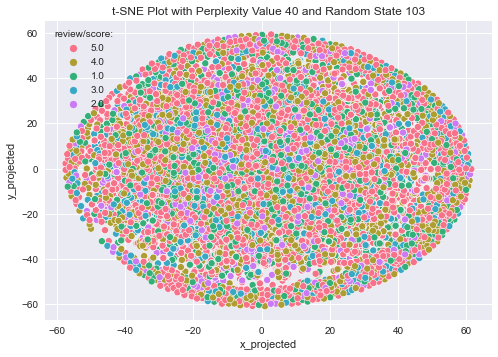

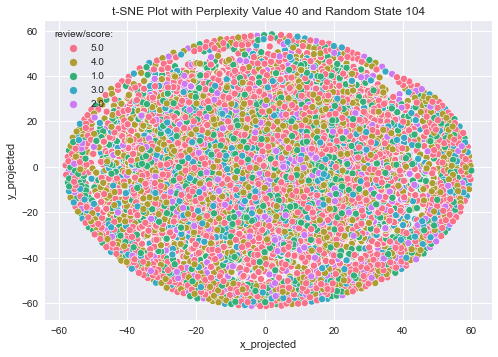

--------------------------------------------


In [213]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df3, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='review/score:', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

## Dataset 4

In [231]:
df3 = pd.read_csv(r"C:\Users\Sandi\Stats MS\542\UIUC-STAT542-Statistical-Learning\Project 3- Movie Review Sentiment Analysis\alldata.tsv",
                 delimiter='\t')

In [232]:
df3 = df3.iloc[9:,:]

In [233]:
df3.head(15)

id  sentiment  score                                             review
9   10          1      9  Five medical students (Kevin Bacon, David Labr...
10  11          0      3  'The Mill on the Floss' was one of the lesser ...
11  12          1      9  I just saw this film at the phoenix film festi...
12  13          0      4  \The Love Letter\" is one of those movies that...
13  14          1      8  Another fantastic offering from the Monkey Isl...
14  15          0      4  This was included on the disk \Shorts: Volume ...
15  16          0      4  I'm not really much of an Abbott & Costello fa...
16  17          0      1  This movie was dreadful. Biblically very inacc...
17  18          0      1  I don't think I've ever gave something a 1/10 ...
18  19          1     10  Excellent story-telling and cinematography. Po...
19  20          0      4  I completely forgot that I'd seen this within ...
20  21          0      1  I like action movies. I have a softspot for \B...
21  22          0      3  This is one of the worst Sandra Bullock movie ...
22  23          1      7  Watched this flick on Saturday afternoon cable...
23  24          0      1  I went to see \TKIA\" with high expectations, ...

In [236]:
data = df3.loc[:, 'review'].tolist()
# tokenization_and_stemming(data[0])

In [237]:
df3['score'].value_counts()

1     10120
10     9730
8      5858
4      5330
3      4961
7      4802
9      4607
2      4583
Name: score, dtype: int64

In [238]:
df3.describe()

id     sentiment         score
count  49991.00000  49991.000000  49991.000000
mean   25005.00000      0.500030      5.495589
std    14431.30299      0.500005      3.478723
min       10.00000      0.000000      1.000000
25%    12507.50000      0.000000      2.000000
50%    25005.00000      1.000000      7.000000
75%    37502.50000      1.000000      9.000000
max    50000.00000      1.000000     10.000000

In [240]:
data = df3.loc[:, 'review'].tolist()

# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 49991 reviews and 1000 terms.


In [241]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [242]:
tfidf_matrix

<49991x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3190202 stored elements in Compressed Sparse Row format>

In [243]:
tfidf_matrix_np=tfidf_matrix.toarray()

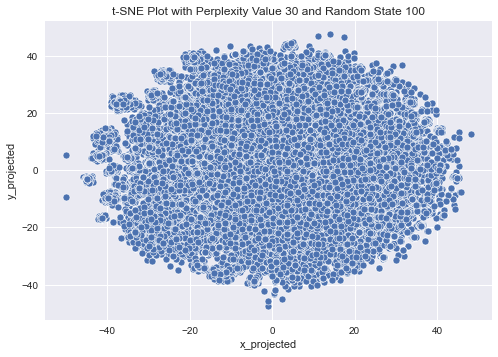

In [244]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [245]:
# for perp in [20, 30, 40]:
#     for rs in [103,104]:
#         tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
#         data_tsne = tsne.fit_transform(tfidf_matrix_np)
#         df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
#         df_combo = pd.concat([df3, df_tsne], axis=1)
#         sns.scatterplot(x='x_projected',y='y_projected', hue='review/score:', palette=sns.color_palette("husl", 5), data=df_combo)
#         plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# #         plt.legend(bbox_to_anchor=(1,1))
#         plt.show()
#     print('--------------------------------------------')

## Dataset 5

In [325]:
df3 = pd.read_excel(r"C:\Users\Sandi\Stats MS\My Projects\mysite\Top_Skills\static\Data\job_data.xlsx")

In [326]:
df3.head(2)

Unnamed: 0               category company  \
0           0  Business Intelligence  Amazon   
1           1  Business Intelligence  Amazon   

                                                link  \
0  https://www.amazon.jobs/en/jobs/987889/data-en...   
1  https://www.amazon.jobs/en/jobs/926586/busines...   

                                               title  \
0  Data Engineer II (L5) - Business Data Technolo...   
1                  Business Intelligence Engineer II   

                    location_and_id             posting_date  \
0  US, WA, Seattle | Job ID: 987889  Posted November 8, 2019   
1   US, TX, Austin | Job ID: 926586   Posted August 26, 2019   

                                         description  \
0  Amazon’s eCommerce Foundation (eCF) organizati...   
1  Join Amazon's Employee Resource Center (ERC) t...   

                                basic_qualifications  \
0  ·\n· A desire to work in a collaborative, inte...   
1  · Bachelor's degree in Math/Statistics/Enginee...   

                            preferred_qualifications country state       city  \
0  ·\n· Industry experience as a Data Engineer or...      US    WA   Seattle    
1  · MBA or Master’s degree in Computer Science, ...      US    TX    Austin    

   job_id              country_name alpha_2 alpha_3  un_code  \
0  987889  United States of America      US     USA    840.0   
1  926586  United States of America      US     USA    840.0   

                                      qualifications  
0  ·\n· A desire to work in a collaborative, inte...  
1  · Bachelor's degree in Math/Statistics/Enginee...

In [327]:
df3 = df3[df3.company == 'Facebook']

In [328]:
df3 = df3.drop_duplicates(subset='description', keep="last")

In [329]:
df3.head(1)

Unnamed: 0            category   company  \
12443           0  Product Management  Facebook   

                                                    link  \
12443  https://www.facebook.com/careers/v2/jobs/20527...   

                                                   title location_and_id  \
12443  Product Manager - Consumer Software (Facebook ...             NaN   

      posting_date                                        description  \
12443          NAL  Lead the ideation, technical development, and ...   

                                    basic_qualifications  \
12443  3+ years product management experience or simi...   

                                preferred_qualifications country state city  \
12443  Experience developing social products, technol...      US    CA  NaN   

       job_id country_name alpha_2 alpha_3  un_code  \
12443       1          NaN     NaN     NaN      NaN   

                                          qualifications  
12443  3+ years product management experience or simi...

In [330]:
df3 = df3.reset_index()

In [331]:
data = df3.loc[:, 'description'].tolist()
# tokenization_and_stemming(data[42])

In [332]:
df3['category'].value_counts()

Research Scientist                     138
Data and Analytics                     120
People & Recruiting                    113
Software Engineering                   102
Global Operations                       88
Business Development & Partnerships     64
Product Management                      56
Name: category, dtype: int64

In [333]:
df3.describe()

index   Unnamed: 0  job_id  un_code
count    681.000000   681.000000   681.0      0.0
mean   13137.195301   694.195301     1.0      NaN
std      356.914463   356.914463     0.0      NaN
min    12443.000000     0.000000     1.0      NaN
25%    12863.000000   420.000000     1.0      NaN
50%    13198.000000   755.000000     1.0      NaN
75%    13456.000000  1013.000000     1.0      NaN
max    13664.000000  1221.000000     1.0      NaN

In [334]:
data = df3.loc[:, 'description'].tolist()

# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 681 reviews and 1000 terms.


In [335]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [336]:
tfidf_matrix

<681x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 49979 stored elements in Compressed Sparse Row format>

In [337]:
tfidf_matrix_np=tfidf_matrix.toarray()

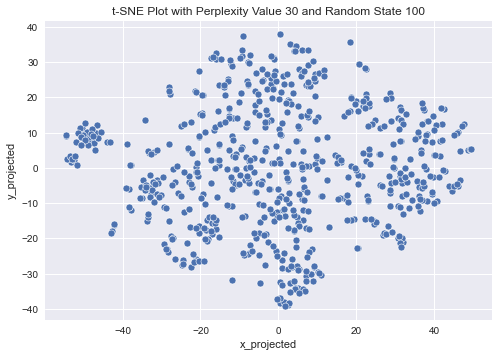

In [338]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [339]:
len(df3['category'].unique())

7

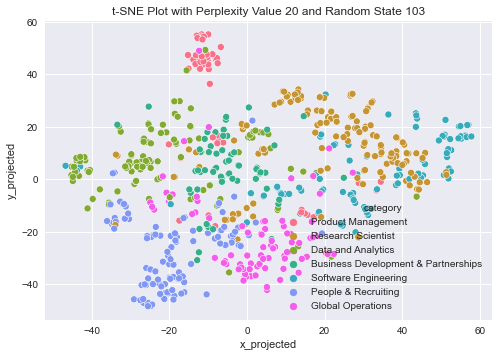

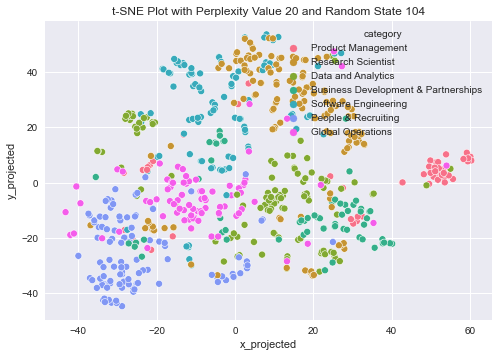

--------------------------------------------


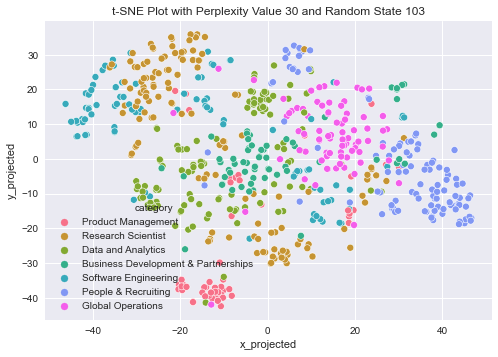

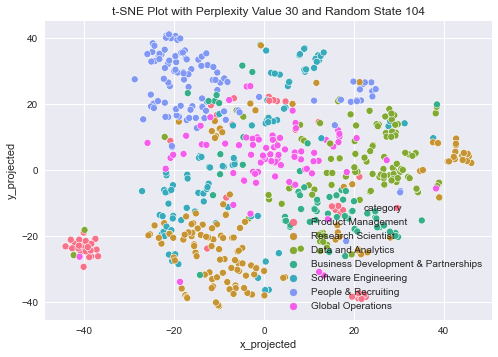

--------------------------------------------


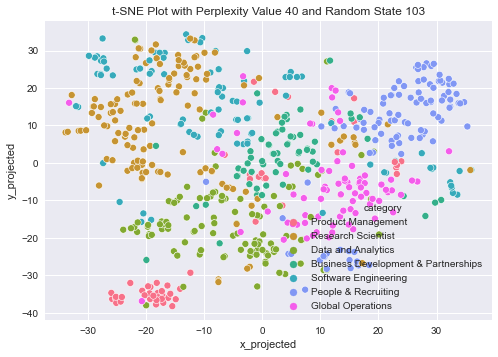

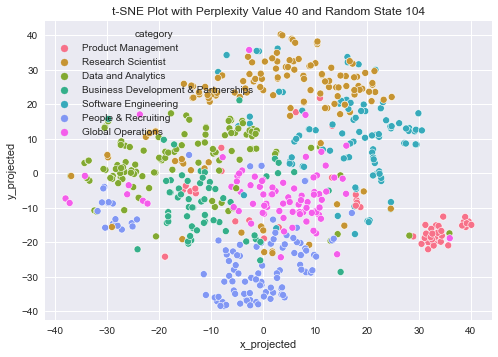

--------------------------------------------


In [340]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df3, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='category', palette=sns.color_palette("husl", 7), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

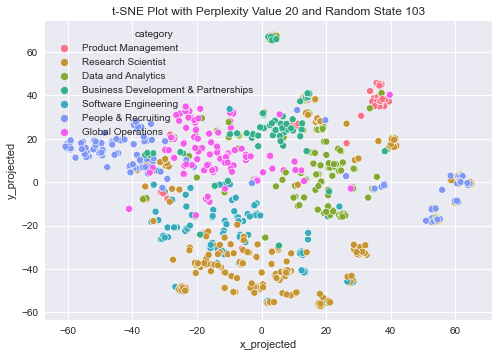

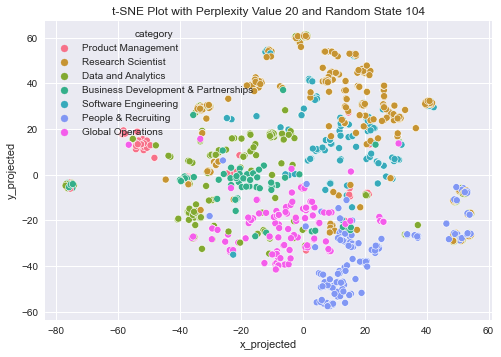

--------------------------------------------


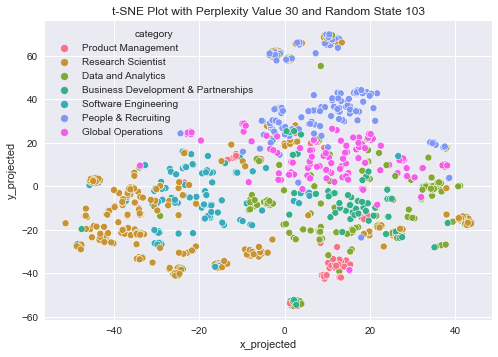

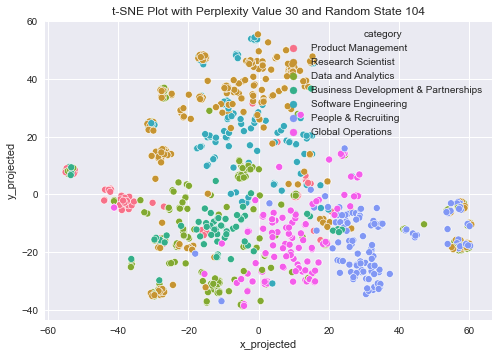

--------------------------------------------


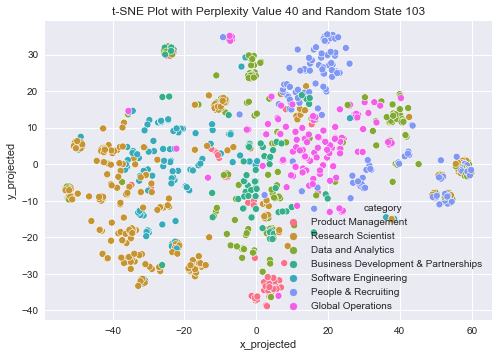

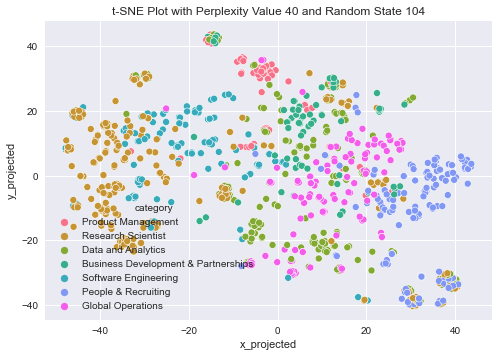

--------------------------------------------


In [270]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df3, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='category', palette=sns.color_palette("husl", 7), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

## Dataset 6

In [274]:
df3 = pd.read_excel(r"C:\Users\Sandi\Stats MS\My Projects\mysite\Top_Skills\static\Data\job_data.xlsx")

In [275]:
df3.head(2)

Unnamed: 0               category company  \
0           0  Business Intelligence  Amazon   
1           1  Business Intelligence  Amazon   

                                                link  \
0  https://www.amazon.jobs/en/jobs/987889/data-en...   
1  https://www.amazon.jobs/en/jobs/926586/busines...   

                                               title  \
0  Data Engineer II (L5) - Business Data Technolo...   
1                  Business Intelligence Engineer II   

                    location_and_id             posting_date  \
0  US, WA, Seattle | Job ID: 987889  Posted November 8, 2019   
1   US, TX, Austin | Job ID: 926586   Posted August 26, 2019   

                                         description  \
0  Amazon’s eCommerce Foundation (eCF) organizati...   
1  Join Amazon's Employee Resource Center (ERC) t...   

                                basic_qualifications  \
0  ·\n· A desire to work in a collaborative, inte...   
1  · Bachelor's degree in Math/Statistics/Enginee...   

                            preferred_qualifications country state       city  \
0  ·\n· Industry experience as a Data Engineer or...      US    WA   Seattle    
1  · MBA or Master’s degree in Computer Science, ...      US    TX    Austin    

   job_id              country_name alpha_2 alpha_3  un_code  \
0  987889  United States of America      US     USA    840.0   
1  926586  United States of America      US     USA    840.0   

                                      qualifications  
0  ·\n· A desire to work in a collaborative, inte...  
1  · Bachelor's degree in Math/Statistics/Enginee...

In [276]:
df3 = df3[df3.company == 'Amazon']

In [308]:
df3 = df3.drop_duplicates(subset='description', keep="last")

In [309]:
df3.head(1)

index  Unnamed: 0               category company  \
1      1           1  Business Intelligence  Amazon   

                                                link  \
1  https://www.amazon.jobs/en/jobs/926586/busines...   

                               title                  location_and_id  \
1  Business Intelligence Engineer II  US, TX, Austin | Job ID: 926586   

             posting_date                                        description  \
1  Posted August 26, 2019  Join Amazon's Employee Resource Center (ERC) t...   

                                basic_qualifications  \
1  · Bachelor's degree in Math/Statistics/Enginee...   

                            preferred_qualifications country state      city  \
1  · MBA or Master’s degree in Computer Science, ...      US    TX   Austin    

   job_id              country_name alpha_2 alpha_3  un_code  \
1  926586  United States of America      US     USA    840.0   

                                      qualifications  
1  · Bachelor's degree in Math/Statistics/Enginee...

In [310]:
df3 = df3.reset_index()

In [311]:
data = df3.loc[:, 'description'].tolist()
# tokenization_and_stemming(data[42])

In [312]:
df3['category'].value_counts()

Software Engineering      6947
Business Intelligence     1149
Machine Learning           480
Data Science               331
Database Administrator      47
Name: category, dtype: int64

In [313]:
df3.describe()

level_0         index    Unnamed: 0        job_id      un_code
count   8954.000000   8954.000000   8954.000000  8.954000e+03  8954.000000
mean    6330.185057   6330.185057   6330.185057  1.511326e+06   712.344092
std     3683.932360   3683.932360   3683.932360  1.045764e+05   241.583944
min        1.000000      1.000000      1.000000  2.960490e+05    36.000000
25%     3064.250000   3064.250000   3064.250000  1.476391e+06   826.000000
50%     6587.500000   6587.500000   6587.500000  1.526228e+06   840.000000
75%     9494.750000   9494.750000   9494.750000  1.575448e+06   840.000000
max    12442.000000  12442.000000  12442.000000  1.620552e+06   840.000000

In [314]:
df3 = df3[df3['description'].notna()]

In [315]:
sum(df3['description'].isna())

0

In [316]:
data = df3.loc[:, 'description'].tolist()

# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 8954 reviews and 1000 terms.


In [317]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [318]:
tfidf_matrix

<8954x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1561844 stored elements in Compressed Sparse Row format>

In [319]:
tfidf_matrix_np=tfidf_matrix.toarray()

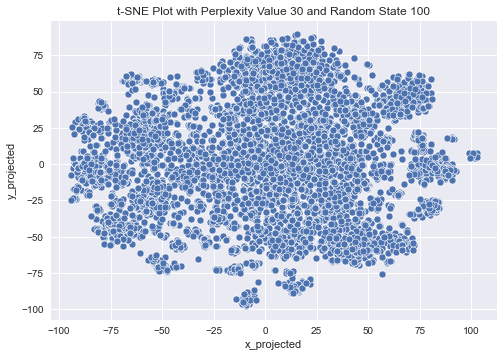

In [320]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [321]:
len(df3['category'].unique())

5

In [322]:
len(df3)

8954

In [323]:
len(df3.description.unique())

8954

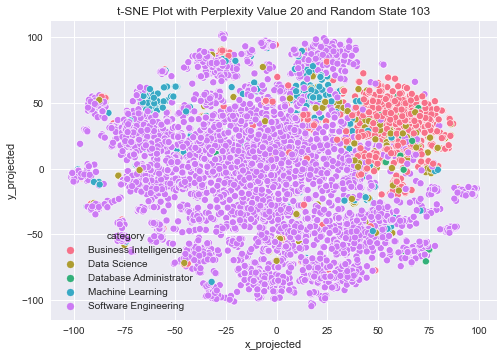

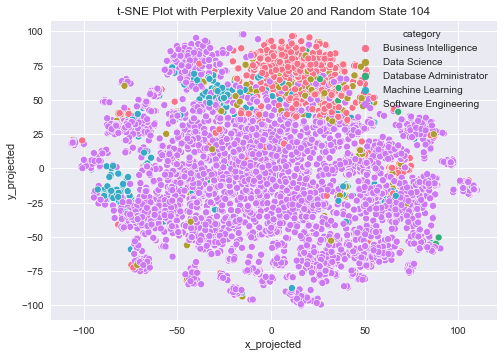

--------------------------------------------


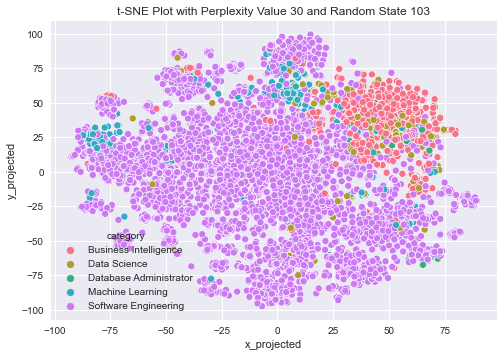

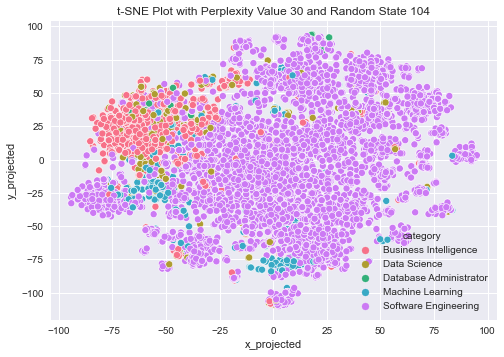

--------------------------------------------


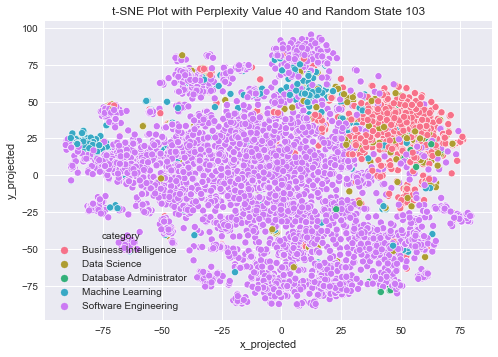

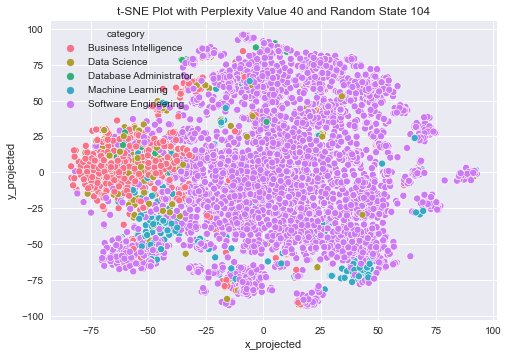

--------------------------------------------


In [324]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df3, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='category', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')